## METODOLOGIA

O relatório Top 500 Chain Restaurant é uma medida dos maiores conceitos de restaurante pelas vendas em todo o sistema dos EUA, com base nos resultados do ano civil de 2019. As informações relevantes são acumuladas usando uma combinação de registros financeiros de empresas públicas, pesquisas diretas com as operadoras, documentos de divulgação de franquia e algoritmos de avaliação proprietários. A Technomic Inc. acredita que suas fontes de informação são confiáveis, mas não assume qualquer responsabilidade pela precisão ou abrangência das informações publicadas.

Os dados podem ser encontrados em https://www.restaurantbusinessonline.com/top-500-2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ranking = pd.read_csv("Top250.csv", index_col='Rank')
ranking.head()

,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
Rank,,,,,,,,
1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


## 1. Limpeza / Transformação

 * NAs
 * %: string para número

In [3]:
# Porcentagem de NAs por coluna

ranking.isna().sum() / ranking.shape[0] * 100

Restaurant           0.0
Content             86.8
Sales                0.0
YOY_Sales            0.0
Units                0.0
YOY_Units            0.0
Headquarters        79.2
Segment_Category     0.0
dtype: float64

In [4]:
# As colunas 'Content' e 'Headquarters' não vão ser necessárias para minha análise de negócio. Portanto, vou excluí-las
ranking.dropna(axis=1, inplace = True)

In [5]:
# %: string para número

print('Os datatypes antes da transformação eram {} e {}'.format(ranking['YOY_Sales'].dtype, ranking['YOY_Units'].dtype))
ranking['YOY_Sales'] = ranking['YOY_Sales'].apply(lambda x: float(x[:-1]))
ranking['YOY_Units'] = ranking['YOY_Units'].apply(lambda x: float(x[:-1]))
print('Após as transformações, os dataypes foram {} e {}'.format(ranking['YOY_Sales'].dtype, ranking['YOY_Units'].dtype))

# Só para confirmar que a transformação ocorreu corretamente
ranking[['YOY_Sales', 'YOY_Units']].head()

Os datatypes antes da transformação eram object e object
Após as transformações, os dataypes foram float64 e float64


,YOY_Sales,YOY_Units
Rank,,
1,4.9,-0.5
2,8.6,3.0
3,13.0,5.0
4,9.0,2.7
5,2.7,0.2


## 2.Visualizações

### Perguntas:

1. Qual foi a média de vendas em 2019? E em 2018? (Sales, YOY_Sales)
2. Qual é a média de unidades por restaurante? 
3. Qual foi o crescimento médio em número de unidades em 2019? 
4. Quais são os segmentos mais rentáveis (Sales)? E os mais comuns? 
5. Quem vende mais por unidade? 

Antes de ver as médias de vendas e unidades, é interessante ver as distribuições dessas variáveis.

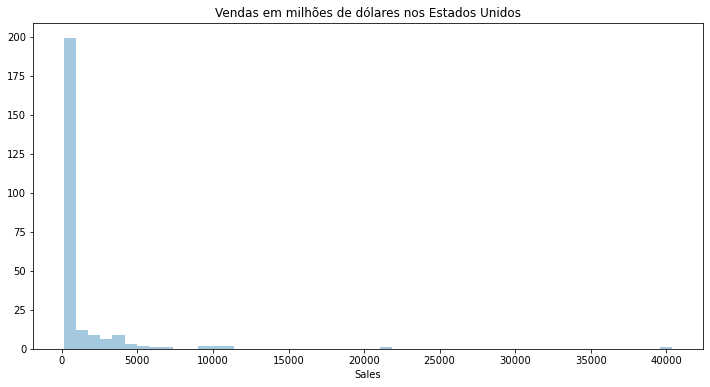

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(a = ranking['Sales'], kde = False)
plt.title('Vendas em milhões de dólares nos Estados Unidos')
plt.show()

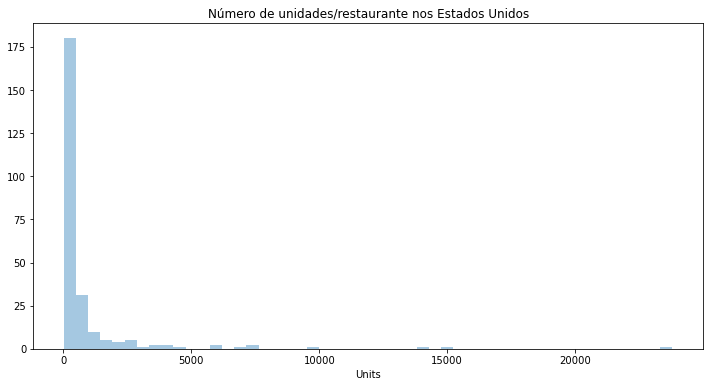

In [7]:
plt.figure(figsize=(12,6))
sns.distplot(a = ranking['Units'], kde = False)
plt.title('Número de unidades/restaurante nos Estados Unidos')
plt.show()

#### Vemos que:

* A maioria dos restaurantes vendeu MENOS que 5 bilhões de dólares em 2019 e tinha menos que 5000 unidades.
* As médias precisam coincidir com as imagens para serem representativas do cenário geral.

In [8]:
#Respondendo a primeira pergunta

media_vendas2019 = ranking['Sales'].sum()/ranking.shape[0]
print('A média de vendas em 2019 foi US$ {:,.2f} milhões.'.format(media_vendas2019))
media_vendas2018 = sum(ranking['Sales']*100/(ranking['YOY_Sales'] + 100))/ranking.shape[0]
print('A média de vendas em 2018 tinha sido US$ {:,.2f} milhões.'.format(media_vendas2018, 2))
print('Um aumento médio de aproximadamente', str(media_vendas2019/media_vendas2018)[3:4], '% de vendas por restaurante.')

A média de vendas em 2019 foi US$ 1,242.74 milhões.
A média de vendas em 2018 tinha sido US$ 1,191.37 milhões.
Um aumento médio de aproximadamente 4 % de vendas por restaurante.


In [9]:
#Respondendo as perguntas 2 e 3

media_unidades2019 = int(round(ranking['Units'].sum()/ranking.shape[0])) # Em unidades inteiras
print('A média de unidades por restaurante em 2019 era', media_unidades2019)
media_unidades2018 = int(round(sum(ranking['Units']*100/(ranking['YOY_Units'] + 100))/ranking.shape[0]))
print('A média de unidades por restaurante em 2018 tinha sido', media_unidades2018)
print('Um aumento médio de', media_unidades2019 - media_unidades2018, 'unidades por restaurante')

A média de unidades por restaurante em 2019 era 850
A média de unidades por restaurante em 2018 tinha sido 847
Um aumento médio de 3 unidades por restaurante


In [10]:
# Esse pode ser um indicador muito importante na análise

vendas_unidades = round(ranking['Sales'].sum() / ranking['Units'].sum(), 2) 
print('A média de vendas por unidade em 2019 foi {:,.2f} milhões de dólares'.format(vendas_unidades))

A média de vendas por unidade em 2019 foi 1.46 milhões de dólares


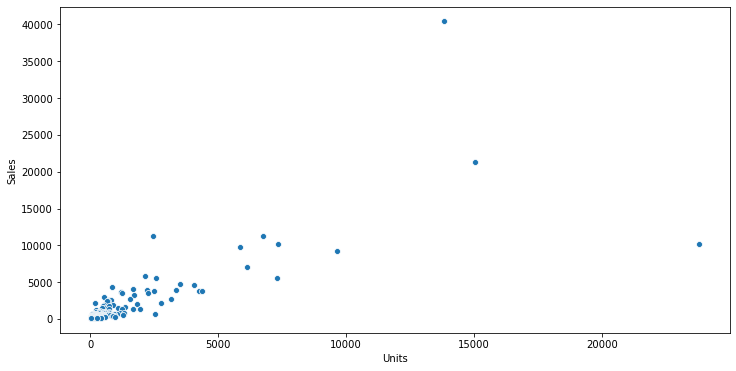

In [11]:
# Checando correlação entre unidades e vendas 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ranking, x='Units', y='Sales')
plt.show()

#### Vemos que:

* Em geral, quanto mais unidades, mais se vende.
* Entretanto, 3 restaurantes chamam a atenção: o que tem mais de 20000 unidades, mas não vende tão bem quanto poderia; um que tem bem menos de 5000 unidades, mas conseguiu vender mais que 10 bilhões de dólares; e McDonald's que vendeu muito mais que todos os outros, com um número também consideravelemente maior de unidades.

#### Perguntas já respondidas:

* [x] Qual foi a média de vendas em 2019? E em 2018? 
* [x] Qual a média de unidades por restaurante? 
* [x] Qual foi crescimento médio em número de unidades?

#### Novas perguntas: 

1. Quais foram esses 3 restaurantes e quais são suas categorias de segmento? 
3. Como a média de vendas por unidade desses 3 restaurantes se compara com a que os outros restaurantes tiveram em 2019?  

In [12]:
# Respondendo a primeira nova pergunta

restaurantes = {}

# Restaurante com o maior número de vendas com menos de 5000 unidades:
nome = ranking.loc[ranking['Units'] < 5000, :].iloc[0, 0]
segmento = ranking.loc[ranking['Units'] < 5000, :].iloc[0, -1]
restaurantes[nome] = segmento

# Restaurante com a pior média de vendas por unidades
nome = ranking.loc[ranking['Units'] > 20000, :].iloc[0, 0]
segmento = ranking.loc[ranking['Units'] > 20000, :].iloc[0, -1]
restaurantes[nome] = segmento

# Restaurante com maior número de vendas
nome = ranking.loc[ranking['Sales'] > 35000, :].iloc[0, 0]
segmento = ranking.loc[ranking['Sales'] > 35000, :].iloc[0, -1]
restaurantes[nome] = segmento

print('Os três restaurantes e suas categorias de segmento foram:')
for x, y in restaurantes.items():
    print (x, '-------->', y)

Os três restaurantes e suas categorias de segmento foram:
Chick-fil-A --------> Quick Service & Chicken
Subway --------> Quick Service & Sandwich
McDonald's --------> Quick Service & Burger


In [13]:
# Criando a coluna vendas/unidade para responder futuras perguntas

ranking['Sales/Unit'] = round(ranking['Sales'] / ranking['Units'], 2)
ranking.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Sales/Unit
Rank,,,,,,,
1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,2.92
2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,1.42
3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,4.58
4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,1.67
5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,1.39


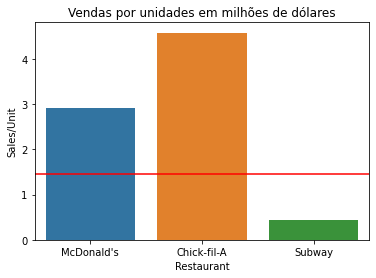

In [14]:
# Respondendo a segunda nova pergunta

sns.barplot(x=ranking.loc[ranking['Restaurant'].isin(restaurantes.keys()), 'Restaurant'],
            y=ranking.loc[ranking['Restaurant'].isin(restaurantes.keys()), 'Sales/Unit']).axhline(vendas_unidades,
                                                                                                        color='red')
plt.title('Vendas por unidades em milhões de dólares')
plt.show()

#### Vemos que:

* As lojas Subway precisariam rever sua estratégia de negócios, pois não chega a vender nem 1 milhão de dólares por unidade.
* Chick-fill-A está fazendo um trabalho (literalmente) muito acima da média.

#### Perguntas já respondidas: 

* [x] Quais foram esses 3 restaurantes e quais são suas categorias de segmento? 
* [x] Como a média de vendas por unidade desses 3 restaurantes se compara com a que os outros restaurantes tiveram em 2019?  

#### Novas perguntas: 

1. Como esses restaurantes se relacionam em números com outros do mesmo setor? 
2. Qual foi o crescimento que esses restaurantes tiveram com relação ao ano anterior (número de unidades, vendas)?  
3. Chick-fill-A é quem vende mais por unidade?

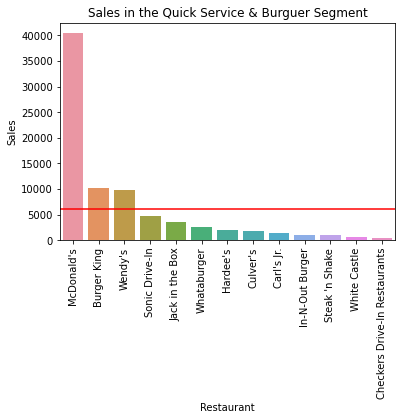

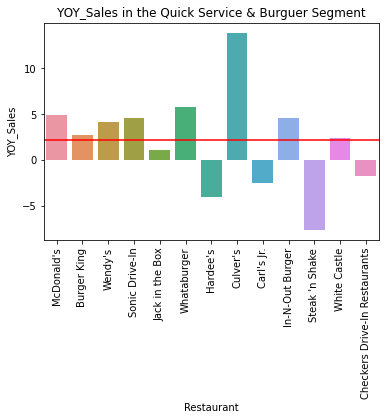

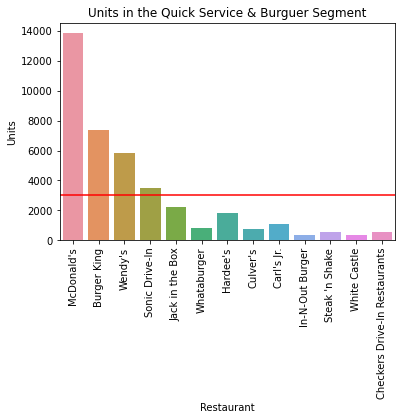

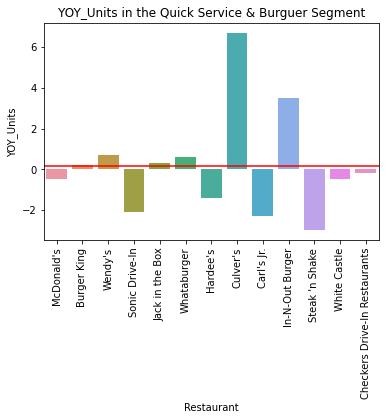

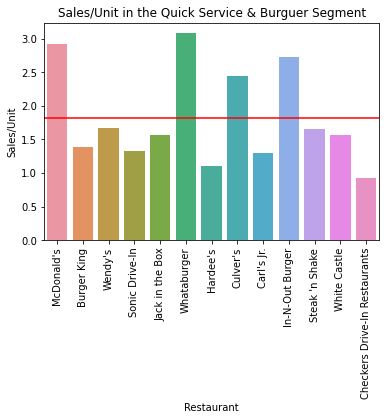

In [15]:
# Respondendo a primeira nova pergunta para o segmento Fast Food e Hambúrgueres

QSandB = ranking.loc[ranking['Segment_Category'] == 'Quick Service & Burger',
                     :].set_index('Restaurant').drop('Segment_Category', axis=1)
for i in QSandB.columns:
    sns.barplot(x=QSandB.index, y=QSandB[i]).axhline(sum(QSandB[i])/QSandB.shape[0], color='red')
    plt.title(i + ' in the Quick Service & Burguer Segment')
    plt.xticks(rotation=90)
    plt.show()

#### Vemos que:

* No segmento de Fast Food e Hambúrgueres, McDonald's é absoluto.
* O restaurante Culver's foi o que mais cresceu no segmento em 2019.
* Entretanto, Whataburger teve uma média maior de vendas por unidades que McDonald's

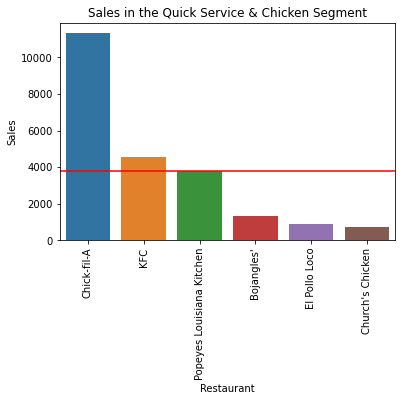

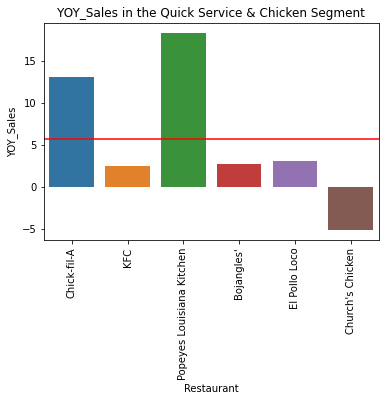

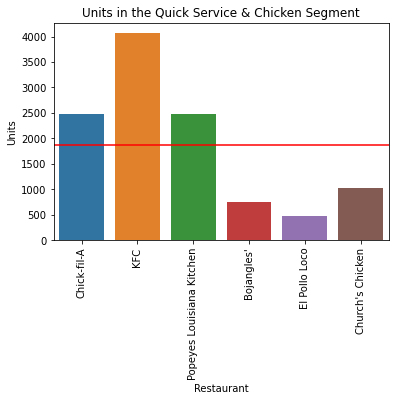

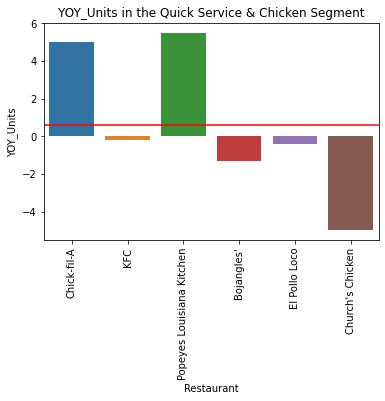

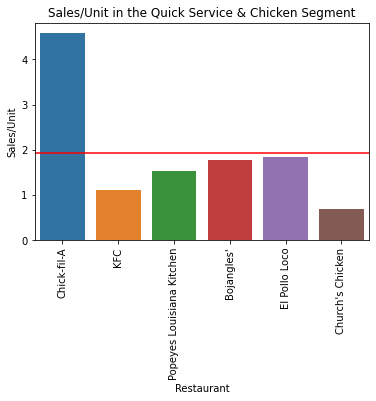

In [16]:
# Respondendo a segunda nova pergunta para o segmento Fast Food e Frango

QSandC = ranking.loc[ranking['Segment_Category'] == 'Quick Service & Chicken', 
                     :].set_index('Restaurant').drop('Segment_Category', axis=1)

for i in QSandC.columns:
    sns.barplot(x=QSandC.index, y=QSandC[i]).axhline(sum(QSandC[i])/QSandC.shape[0], color='red')
    plt.title(i + ' in the Quick Service & Chicken Segment')
    plt.xticks(rotation=90)
    plt.show()

#### Vemos que:

* No segmento de Fast Food e Frango, Chick-fill-A é absoluto.
* Entretanto, o restaurante Popeyes Lousiana Kitchen foi o líder de crescimento em 2019 no setor. 

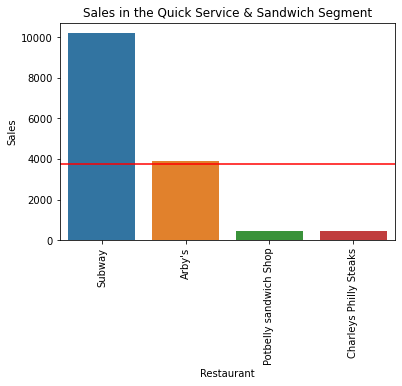

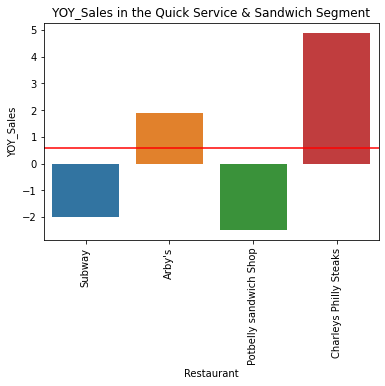

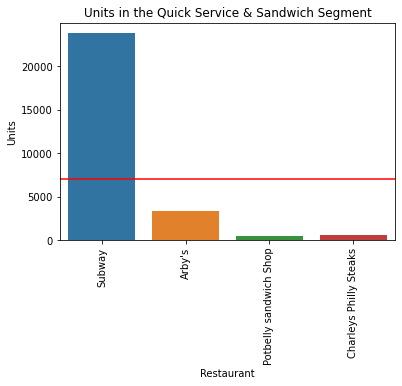

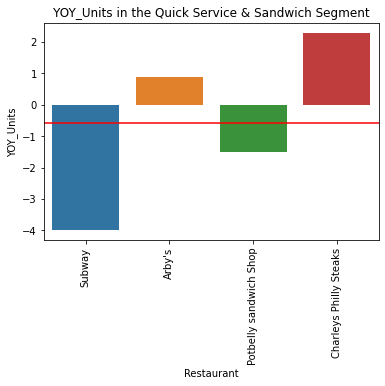

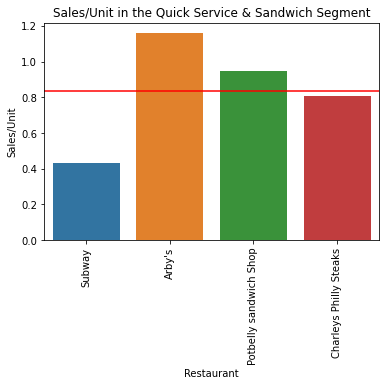

In [17]:
# Respondendo a terceira nova pergunta para o segmento Fast Food e Sanduíches

QSandS = ranking.loc[ranking['Segment_Category'] == 'Quick Service & Sandwich', 
                     :].set_index('Restaurant').drop('Segment_Category', axis=1)

for i in QSandS.columns:
    sns.barplot(x=QSandS.index, y=QSandS[i]).axhline(sum(QSandS[i])/QSandS.shape[0], color='red')
    plt.title(i + ' in the Quick Service & Sandwich Segment')
    plt.xticks(rotation=90)
    plt.show()

#### Vemos que:

* Subway teve um 2019 muito ruim e precisa entender o que tem acontecido. 
* O segmento em geral não teve um bom ano, com excessão de Charleys Philly Steaks.

#### Perguntas respondidas: 

* [x] Como esses restaurantes se relacionam em números com outros do mesmo setor? 
* [x] Qual foi o crescimento que esses restaurantes tiveram com relação ao ano anterior (número de unidades, vendas)?  

#### Perguntas que ainda faltam ser respondidas:

1. Quais são os segmentos mais rentáveis? E os mais comuns?
2. Qual é o restaurante que vende mais por unidade? (Chick-fill-A?)

In [19]:
# Quais são os segmentos mais rentáveis? (Top 10)

top10vendas = pd.pivot_table( data=ranking,
                        index='Segment_Category',
                        aggfunc='sum',
                        values=['Sales', 'Sales/Unit']).sort_values(by='Sales', ascending=False)[:10]

top10vendas

,Sales,Sales/Unit
Segment_Category,,
Quick Service & Burger,79384,23.67
Quick Service & Coffee Cafe,31889,4.92
Quick Service & Chicken,22619,11.56
Quick Service & Pizza,21316,6.75
Casual Dining & Varied Menu,15686,40.55
Quick Service & Sandwich,14965,3.35
Quick Service & Mexican,12143,3.10
Family Dining & Family Style,11677,13.01
Casual Dining & Steak,8014,15.04


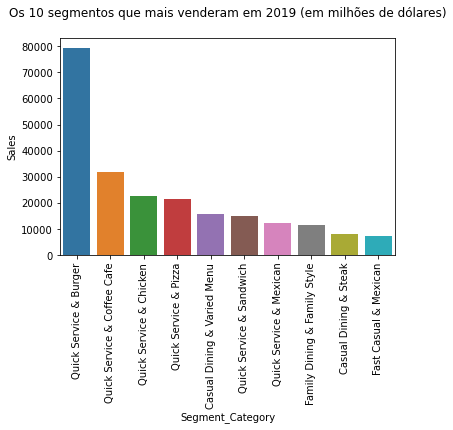

In [20]:
sns.barplot(data=top10vendas, x=top10vendas.index, y='Sales')
plt.title('Os 10 segmentos que mais venderam em 2019 (em milhões de dólares)' + '\n')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Top 10 segmentos mais populares

df = pd.pivot_table(data=ranking,
                    index='Segment_Category',
                    values=['Units', 'Restaurant'],
                    aggfunc=['sum', 'count']).iloc[:, :2]

df.columns = ['Units', 'Restaurant']

df = df.sort_values(by='Units', ascending=False)[:10]
df

,Units,Restaurant
Segment_Category,,
Quick Service & Burger,39172,13
Quick Service & Sandwich,28171,4
Quick Service & Coffee Cafe,25763,4
Quick Service & Pizza,24027,8
Quick Service & Chicken,11271,6
Quick Service & Mexican,7362,2
Family Dining & Family Style,7047,7
Quick Service & Frozen Desserts,6905,2
Fast Casual & Sandwich,6414,6


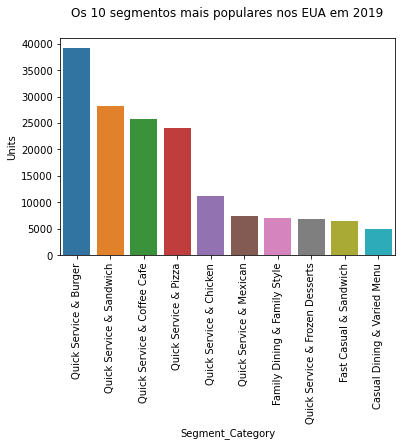

In [22]:
sns.barplot(data=df, x=df.index, y='Units')
plt.title('Os 10 segmentos mais populares nos EUA em 2019' + '\n')
plt.xticks(rotation=90)
plt.show()

#### Vemos que:

* Os restaurantes da modalidade Fast Food são de fato os mais populares e os mais rentáveis nos EUA.
* Destes, os especializados em hambúrgueres são os mais comuns e os que mais vendem

In [27]:
# Qual é o restaurante que vende mais por unidade? (Chick-fill-A)

top = ranking[['Restaurant', 'Sales/Unit']].sort_values(by='Sales/Unit', ascending=False).iloc[0,:]
chick = ranking.loc[ranking['Restaurant'] == 'Chick-fil-A', 'Sales/Unit']
print('O Restaurante com melhor média de vendas por unidade foi', top[0])
print('Uma média de US$ {:,.2f} milhões a mais por unidade'.format(top[1] - chick.values[0]))

# Entendendo os dados sobre o restaurante com maior média de vendas por unidade:
ranking.loc[ranking['Restaurant'] == top[0], :]

O Restaurante com melhor média de vendas por unidade foi Mastro's Restaurants
Uma média de US$ 8.86 milhões a mais por unidade


,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Sales/Unit
Rank,,,,,,,
155,Mastro's Restaurants,242,9.7,18,5.9,Steak,13.44


#### Nova pergunta:

* Os rankings dos setores mudariam se excluíssemos os restaurantes com a melhor e o pior resultado? 

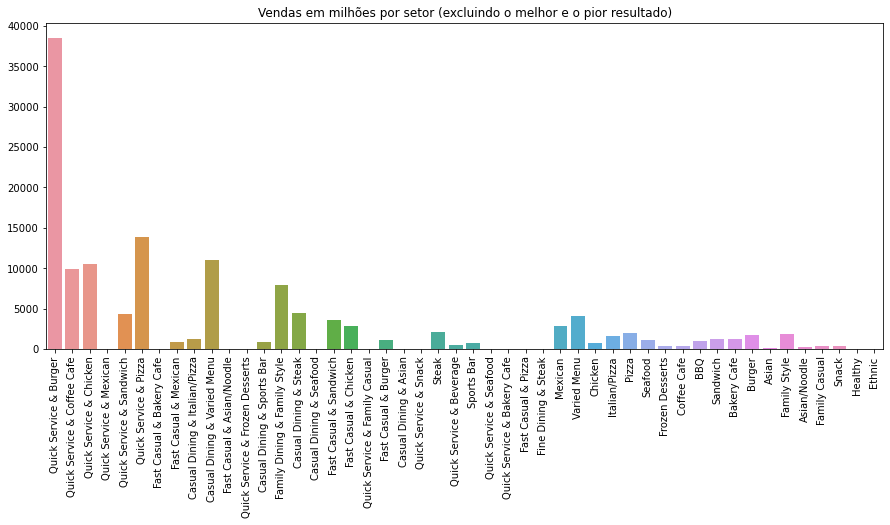

In [26]:
# Vendas

segmentos = ranking['Segment_Category'].unique()
novo_ranking = {}

for i in segmentos:
    novas_vendas = ranking.loc[ranking['Segment_Category'] == i, ['Segment_Category', 'Sales']][1:-1]
    novo_ranking[i] = novas_vendas.sum()[1]

plt.figure(figsize=(15,6))
sns.barplot(x=list(novo_ranking.keys()), y=list(novo_ranking.values()))
plt.title('Vendas em milhões por setor (excluindo o melhor e o pior resultado)')
plt.xticks(rotation=90)
plt.show()

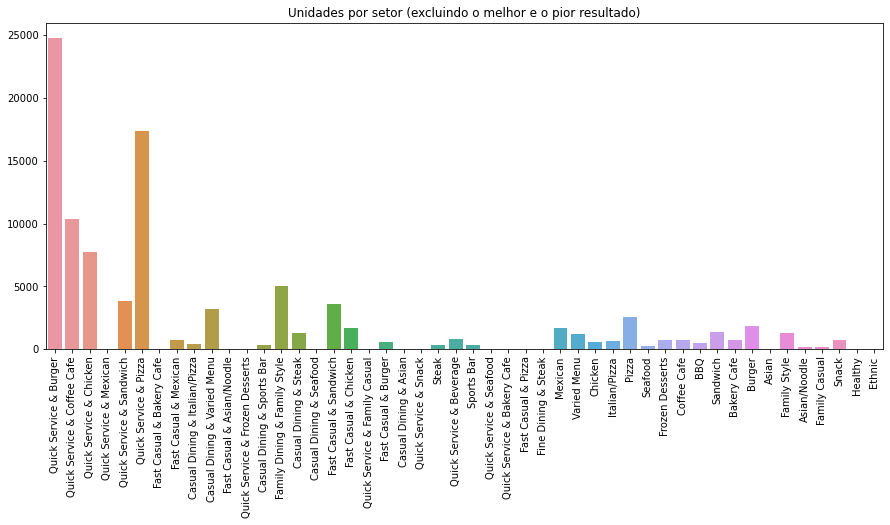

In [25]:
# Unidades

segmentos = ranking['Segment_Category'].unique()
novo_ranking = {}

for i in segmentos:
    novas_unidades = ranking.loc[ranking['Segment_Category'] == i, ['Segment_Category', 'Units']][1:-1]
    novo_ranking[i] = novas_unidades.sum()[1]

plt.figure(figsize=(15,6))
sns.barplot(x=list(novo_ranking.keys()), y=list(novo_ranking.values()))
plt.title('Unidades por setor (excluindo o melhor e o pior resultado)')
plt.xticks(rotation=90)
plt.show()

#### Vemos que:

* Mesmo excluindo o melhor e o pior resultado, o setor mais popular e mais rentável é Fast Food e Hambúrgueres.

### Respostas:

1. A média de vendas em 2019 foi 0.124 bilhões de dólares; em 2018, 0.119 bilhões de dólares.
2. A média de unidades em 2019 foi 850.
3. Houve um crescimento médio de 3 unidades por restaurante. 
4. O segmento mais rentável e mais comum nos EUA sem dúvidas é Fast Food e Hambúrgueres. 
5. Quem vende mais por unidade é a churrascaria "Mastro's Restaurants".

## 3. Resumo e recomendações:

* O setor de Fast Food e Hambúrgueres é o preferido dos americanos e talvez o que mais lucra.
* Nesse setor se destaca o restaurante Whataburger - que teve uma média de vendas por unidade maior que o líder do setor, o McDonald's.
* O Restaurante Chick-fil-A merece atenção muito especial. 